In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scikitplot as skplt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import Imputer
from pandas.plotting import scatter_matrix
from sklearn import svm
from pyspark.sql import SparkSession

%matplotlib inline

seed = 42


In [2]:
spark1 = SparkSession.builder.appName('Ops').getOrCreate()

In [6]:
# loading data 

def load_airlines_data():        
    return pd.read_csv("G:\\mini project\\data.csv")

data= load_airlines_data()

In [7]:
import networkx as nx
df = nx.from_pandas_edgelist(data, source='Origin', target='Dest', edge_attr=True)

In [8]:
df.nodes()

NodeView(('ORF', 'TPA', 'GEG', 'MAF', 'BUF', 'ALB', 'JAX', 'PBI', 'HOU', 'SLC', 'BHM', 'DEN', 'OAK', 'SNA', 'PHX', 'RDU', 'CLE', 'PDX', 'OMA', 'LIT', 'ISP', 'HRL', 'MDW', 'LBB', 'BDL', 'BNA', 'MCI', 'PHL', 'ONT', 'MSY', 'PIT', 'OKC', 'AMA', 'LAS', 'SMF', 'SJC', 'RSW', 'JAN', 'ELP', 'TUS', 'IAD', 'SFO', 'CMH', 'ABQ', 'MCO', 'LAX', 'PVD', 'BWI', 'CRP', 'DAL', 'BUR', 'IND', 'BOI', 'DTW', 'AUS', 'SDF', 'MHT', 'RNO', 'TUL', 'SAN', 'SEA', 'FLL', 'SAT', 'STL'))

In [9]:
df.edges()

EdgeView([('ORF', 'MDW'), ('ORF', 'TPA'), ('ORF', 'BWI'), ('ORF', 'LAS'), ('ORF', 'JAX'), ('ORF', 'MCO'), ('TPA', 'PVD'), ('TPA', 'HOU'), ('TPA', 'BNA'), ('TPA', 'ALB'), ('TPA', 'LAS'), ('TPA', 'JAX'), ('TPA', 'PBI'), ('TPA', 'BHM'), ('TPA', 'IAD'), ('TPA', 'STL'), ('TPA', 'CMH'), ('TPA', 'ABQ'), ('TPA', 'PHX'), ('TPA', 'BDL'), ('TPA', 'SDF'), ('TPA', 'BUF'), ('TPA', 'BWI'), ('TPA', 'ISP'), ('TPA', 'IND'), ('TPA', 'AUS'), ('TPA', 'RDU'), ('TPA', 'MHT'), ('TPA', 'MCI'), ('TPA', 'PHL'), ('TPA', 'MSY'), ('TPA', 'PIT'), ('TPA', 'DEN'), ('TPA', 'FLL'), ('TPA', 'MDW'), ('TPA', 'SAT'), ('GEG', 'SLC'), ('GEG', 'SEA'), ('GEG', 'OAK'), ('GEG', 'LAS'), ('GEG', 'BOI'), ('GEG', 'PDX'), ('MAF', 'LAS'), ('MAF', 'ABQ'), ('MAF', 'HOU'), ('MAF', 'DAL'), ('MAF', 'AUS'), ('BUF', 'MDW'), ('BUF', 'BWI'), ('BUF', 'LAS'), ('BUF', 'PHX'), ('BUF', 'MCO'), ('ALB', 'LAS'), ('ALB', 'MDW'), ('ALB', 'BWI'), ('ALB', 'MCO'), ('JAX', 'BNA'), ('JAX', 'BHM'), ('JAX', 'BWI'), ('JAX', 'IND'), ('JAX', 'FLL'), ('JAX', 'HOU')

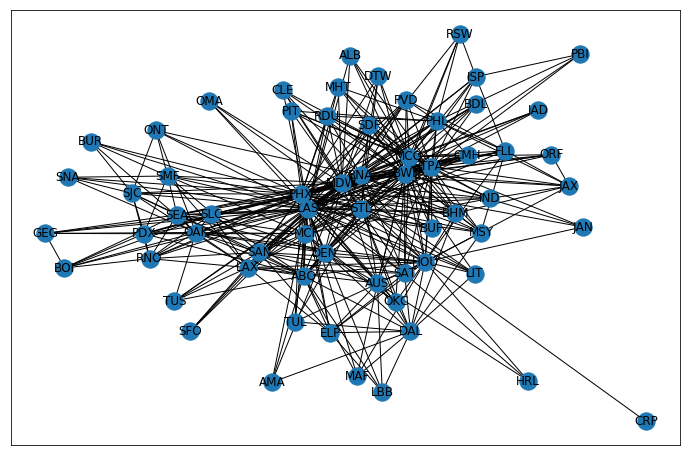

In [15]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(12,8))
nx.draw_networkx(df, with_labels=True)

In [16]:
shortest_path_distance = nx.dijkstra_path(df, source='AMA', target='PBI', weight='Distance')
shortest_path_distance

['AMA', 'DAL', 'MSY', 'TPA', 'PBI']

In [17]:
shortest_path_distance = nx.dijkstra_path(df, source='AMA', target='PBI', weight='AirTime')
shortest_path_distance

['AMA', 'DAL', 'BHM', 'TPA', 'PBI']

In [18]:
shortest_path_distance = nx.dijkstra_path(df, source='AMA', target='HRL', weight='AirTime')
shortest_path_distance

['AMA', 'DAL', 'AUS', 'HRL']